In [2]:
# first import needed packages
import numpy as np
import xarray as xr
import xmitgcm
import xgcm
import glob
from os.path import expanduser,join
import sys
import matplotlib.pyplot as plt
import ecco_v4_py as ecco

user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))   # only needed if ecco_v4_py files are stored under this directory
sys.path.append(join(user_home_dir,'ECCO-v4-Python-Tutorial'))   # only needed if ecco_v4_py files are stored under this directory

import ecco_access as ea
# from ecco_po_tutorials import *
import gsw

# ShortNames
grid_params_shortname = "ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"
denspress_monthly_shortname = "ECCO_L4_DENS_STRAT_PRESS_LLC0090GRID_MONTHLY_V4R4"
SSH_monthly_shortname = "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4"
TS_monthly_shortname = "ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4"

In [3]:
# indicate mode of access
# options are:
# 'download': direct download from internet to your local machine
# 'download_ifspace': like download, but only proceeds 
#                     if your machine have sufficient storage
# 's3_open': access datasets in-cloud from an AWS instance
# 's3_open_fsspec': use jsons generated with fsspec and 
#                   kerchunk libraries to speed up in-cloud access
# 's3_get': direct download from S3 in-cloud to an AWS instance
# 's3_get_ifspace': like s3_get, but only proceeds if your instance 
#                   has sufficient storage

# fancy way of opening big datasets hosted on the cloud
access_mode = 's3_open_fsspec'

# download root (parent) directory
download_root_dir = join(user_home_dir,'efs_ecco','ECCO_V4r4_PODAAC')

# for access_mode = 's3_open_fsspec', need to specify the root directory 
# containing the jsons
jsons_root_dir = join(user_home_dir,'efs_ecco','mzz-jsons')

# access and merge datasets
StartDate = '1992-01'
EndDate = '2017-12'

density = ea.ecco_podaac_to_xrdataset("ECCO_L4_DENS_STRAT_PRESS_05DEG_DAILY_V4R4",\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [4]:
ShortNames_list = [grid_params_shortname,denspress_monthly_shortname,\
                   SSH_monthly_shortname,TS_monthly_shortname]


ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",
                   "ECCO_L4_DENS_STRAT_PRESS_LLC0090GRID_MONTHLY_V4R4"]

ds_dict = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [5]:
ecco_grid = ds_dict['ECCO_L4_GEOMETRY_LLC0090GRID_V4R4']
dens_ds =  ds_dict['ECCO_L4_DENS_STRAT_PRESS_LLC0090GRID_MONTHLY_V4R4']

In [6]:
ecco_grid.load()

<xarray.Dataset> Size: 89MB
Dimensions:  (tile: 13, j: 90, i: 90, k: 50, k_p1: 51, nb: 4, j_g: 90, i_g: 90,
              nv: 2, k_l: 50, k_u: 50)
Coordinates: (12/20)
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    XG       (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    YG       (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...       ...
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PHrefC   (k) float32 200B 49.05 147.1 245.2 ... 5.357e+04 5.794e+04
    PHrefF   (k_p1) float32 204B 0.0 98.1 196.2 ... 5.145e+04 5.57e+04 6.018e+04
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    drC      (k_p1) float32 204B 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    ...       ...
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    rAs      (tile, j_g, i) float32 421kB 1.802e+08 1.807e+08 ... 3.605e+08
    rAw      (tile, j, i_g) float32 421kB 3.617e+08 3.628e+08 ... 3.648e+08
    rAz      (tile, j_g, i_g) float32 421kB 1.799e+08 1.805e+08 ... 3.642e+08
Attributes: (12/58)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

In [7]:
dens_ds

<xarray.Dataset> Size: 26GB
Dimensions:    (time: 312, k_l: 50, tile: 13, j: 90, i: 90, k: 50, nb: 4,
                j_g: 90, i_g: 90, nv: 2, k_p1: 51, k_u: 50)
Coordinates: (12/22)
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2kB 1992-01-16T18:00:00 ... 2017-12-16T0...
    time_bnds  (time, nv) datetime64[ns] 5kB dask.array<chunksize=(312, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables:
    DRHODR     (time, k_l, tile, j, i) float32 7GB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    PHIHYD     (time, k, tile, j, i) float32 7GB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    PHIHYDcR   (time, k, tile, j, i) float32 7GB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    RHOAnoma   (time, k, tile, j, i) float32 7GB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            08aac914-4182-11eb-aa27-0cc47a3f47c5

In [8]:
dens_anom = dens_ds['RHOAnoma']
dens_anom

<xarray.DataArray 'RHOAnoma' (time: 312, k: 50, tile: 13, j: 90, i: 90)> Size: 7GB
dask.array<getitem, shape=(312, 50, 13, 90, 90), dtype=float32, chunksize=(6, 50, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    XC       (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z        (k) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 2kB 1992-01-16T18:00:00 ... 2017-12-16T06:...
Attributes:
    comment:                In-situ seawater density anomaly relative to the ...
    coverage_content_type:  modelResult
    long_name:              In-situ seawater density anomaly
    units:                  kg m-3
    valid_max:              25.540061950683594
    valid_min:              -18.81316375732422

In [9]:
rho_surf_0 = dens_anom.isel(time=0,k=0).load() + 1029
rho_surf_as_0 = dens_anom.isel(time=3,k=0).load() + 1029
rho_surf_aw_0 = dens_anom.isel(time=9,k=0).load() + 1029

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41999")
client

In [10]:
dens_anom_by_month = dens_anom.isel(k=0).groupby('time.month').mean('time')


In [18]:
dens_anom_by_month = dens_anom_by_month.compute()

In [19]:
dens_anom_by_month

<xarray.DataArray 'RHOAnoma' (month: 12, tile: 13, j: 90, i: 90)> Size: 5MB
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [-2.1837873, -2.177463 , -2.1680062, ..., -1.8490785,
          -1.8494843, -1.8504624],
         [-2.1685286, -2.162187 , -2.1529822, ..., -1.8532348,
          -1.8543693, -1.8564652],
         [-2.158752 , -2.1540456, -2.1463103, ..., -1.8553596,
          -1.8574315, -1.8611819]],

        [[-2.1511526, -2.1478398, -2.1411989, ..., -1.8569744,
          -1.8599699, -1.8656532],
         [-2.1453567, -2.1419158, -2.1347232, ..., -1.8600018,
          -1.863991 , -1.8716557],
         [-2.1406946, -2.1359897, -2.125902 , ..., -1.8647523,
          -1.869608 , -1.8789127],
...
         [-5.931737 , -5.934141 , -5.92024  , ..., -2.0465171,
          -2.0469987, -2.0493546],
         [-5.9175167, -5.9180527, -5.9033957, ..., -2.0447593,
          -2.0492063, -2.055318 ],
         [-5.9092484, -5.910203 , -5.8976817, ..., -2.0400517,
          -2.048018 , -2.0564394]],

        [[-2.0438876, -2.0091019, -1.9733995, ...,        nan,
                 nan,        nan],
         [-2.042884 , -2.0081267, -1.9742355, ...,        nan,
                 nan,        nan],
         [-2.0402846, -2.0062773, -1.9750386, ...,        nan,
                 nan,        nan],
         ...,
         [-2.0537596, -2.0594568, -2.0691333, ...,        nan,
                 nan,        nan],
         [-2.0616903, -2.0682595, -2.0797772, ...,        nan,
                 nan,        nan],
         [-2.0641356, -2.0716593, -2.0840328, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    Z        float32 4B -5.0
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    k        int32 4B 0
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    comment:                In-situ seawater density anomaly relative to the ...
    coverage_content_type:  modelResult
    long_name:              In-situ seawater density anomaly
    units:                  kg m-3
    valid_max:              25.540061950683594
    valid_min:              -18.81316375732422

(<Figure size 900x900 with 25 Axes>,
 array([[nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]]))

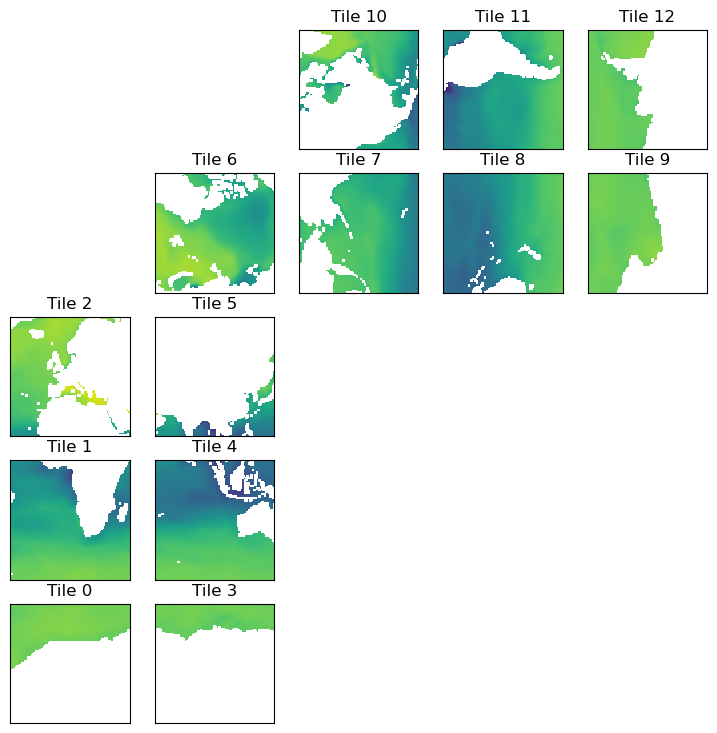

In [20]:
ecco.plot_tiles(rho_surf_0)

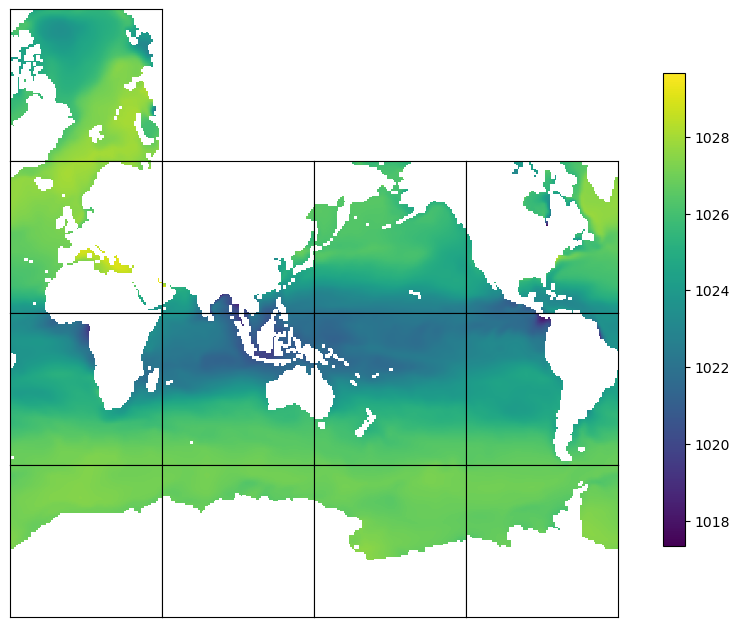

In [21]:
ecco.plot_tiles(rho_surf_0, rotate_to_latlon=True, layout='latlon', 
                show_tile_labels=False, show_colorbar=True);

In [22]:
dens_anom_by_month.dims

('month', 'tile', 'j', 'i')

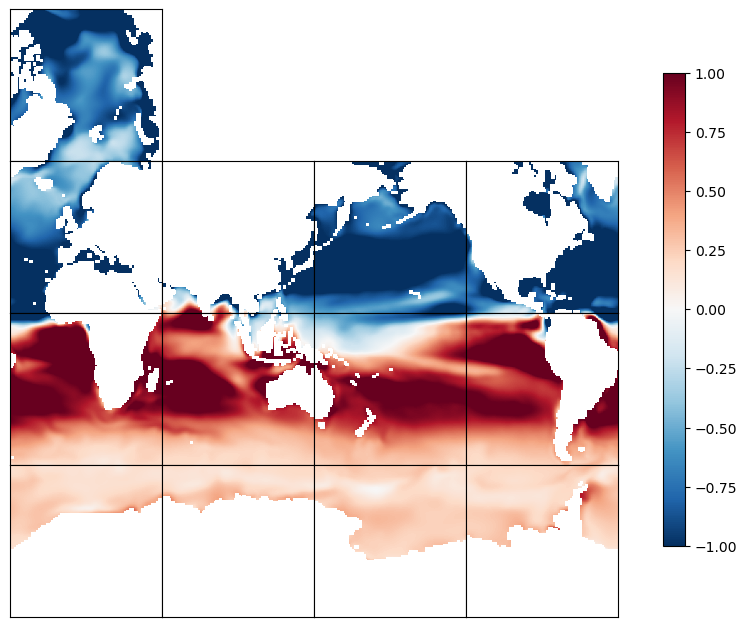

In [23]:

ecco.plot_tiles(dens_anom_by_month[9]-dens_anom_by_month[3], rotate_to_latlon=True, layout='latlon', 
                show_tile_labels=False, show_colorbar=True, cmin=-1, cmax=1);


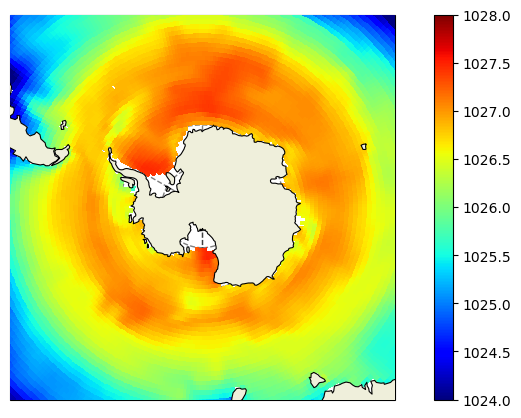

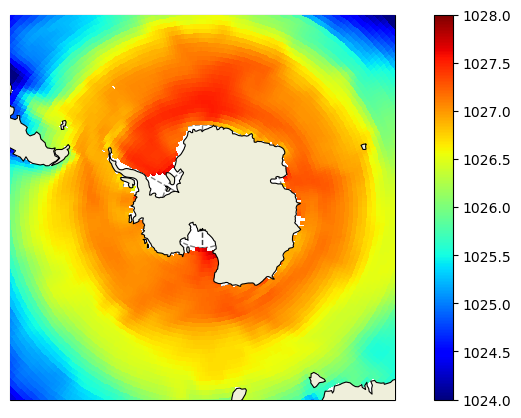

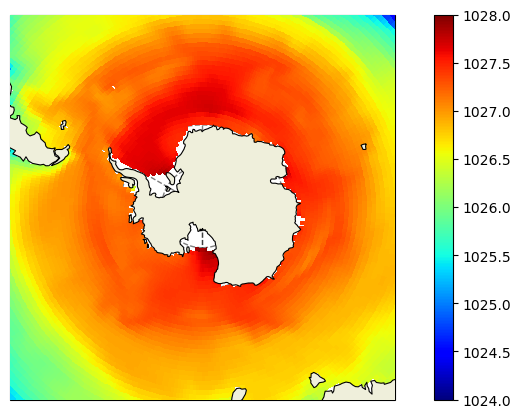

In [24]:

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, rho_surf_0, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=1024, cmax=1028)

;

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, rho_surf_as_0, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=1024, cmax=1028)

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, rho_surf_aw_0, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=1024, cmax=1028)

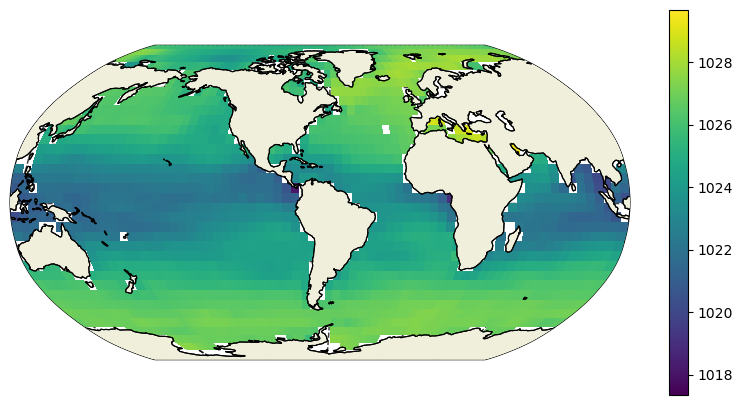

In [25]:
plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, rho_surf_0, 
                              show_colorbar=True, dx=5,dy=5, user_lon_0=-67);

# T & S

In [26]:
ts_ds = ea.ecco_podaac_to_xrdataset("ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4",\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)
t_ds = ts_ds.THETA
s_ds = ts_ds.SALT

In [27]:
t_ds.dims

('time', 'k', 'tile', 'j', 'i')

In [28]:
salt_surf_0 = s_ds.isel(k=0, time=0).load()
salt_surf_aw = s_ds.isel(k=0, time=9).load()
salt_surf_as = s_ds.isel(k=0, time=3).load()

In [29]:
salt_surf_0.min

<bound method DataArrayAggregations.min of <xarray.DataArray 'SALT' (tile: 13, j: 90, i: 90)> Size: 421kB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [33.48337 , 33.485424, 33.482845, ..., 33.771618, 33.7772  ,
         33.781094],
        [33.57094 , 33.567955, 33.56055 , ..., 33.782993, 33.788094,
         33.79194 ],
        [33.614273, 33.60744 , 33.598095, ..., 33.79657 , 33.800964,
         33.80403 ]],

       [[33.634212, 33.62599 , 33.6164  , ..., 33.808456, 33.811886,
         33.814686],
        [33.64095 , 33.632725, 33.624302, ..., 33.817818, 33.819992,
         33.822655],
        [33.64022 , 33.632465, 33.626774, ..., 33.82536 , 33.826252,
         33.828896],
...
        [36.0573  , 36.12452 , 36.152252, ..., 33.658413, 33.6596

In [33]:
temp_by_month = t_ds.isel(k=0).groupby('time.month').mean('time')
temp_by_month=temp_by_month.compute()

In [34]:
salt_by_month = s_ds.isel(k=0).groupby('time.month').mean('time')
salt_by_month=salt_by_month.compute()

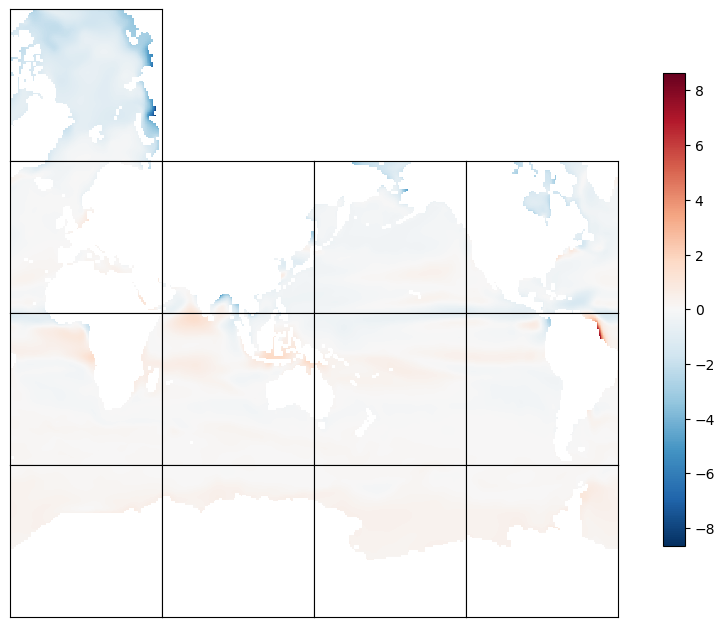

In [36]:
ecco.plot_tiles(salt_by_month[9]-salt_by_month[3], rotate_to_latlon=True, layout='latlon', 
                show_tile_labels=False, show_colorbar=True);


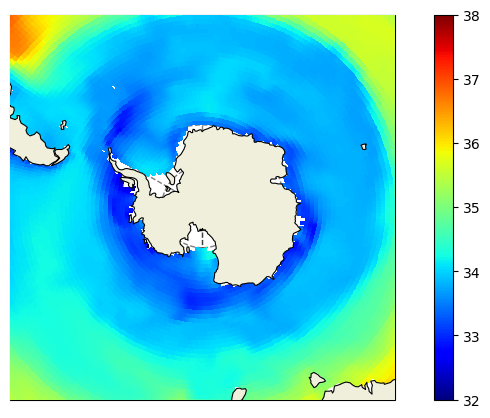

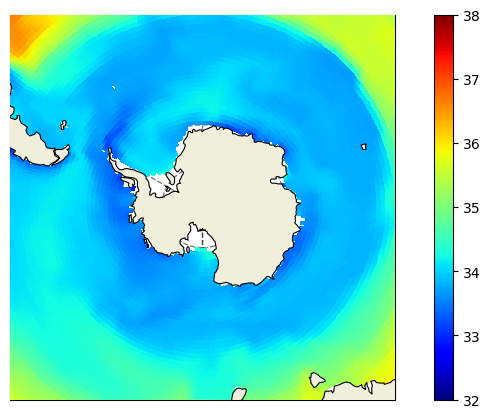

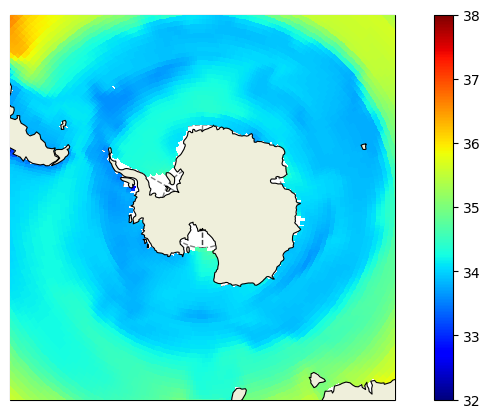

In [37]:

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, salt_surf_0, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=32, cmax=38)

;

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, salt_surf_as, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=32, cmax=38)

plt.figure(figsize=[10,5]);
SZ = ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, salt_surf_aw, 
                              show_colorbar=True, user_lon_0=0, 
                              projection_type='stereo', 
                              lat_lim = -45, dx=1,dy=1, 
                              cmap='jet', cmin=32, cmax=38)

# get to work

In [38]:
dens_3d_0 = dens_anom[0].load()

In [39]:
dens_3d_0

<xarray.DataArray 'RHOAnoma' (k: 50, tile: 13, j: 90, i: 90)> Size: 21MB
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [-2.180756 , -2.1755278, -2.1750772, ..., -1.9753723,
          -1.9755763, -1.9767791],
         [-2.1280527, -2.1277573, -2.1315866, ..., -1.9742484,
          -1.9757743, -1.9777861],
         [-2.1094744, -2.1131148, -2.1185143, ..., -1.9690036,
          -1.9717867, -1.9755003]],

        [[-2.1092052, -2.114207 , -2.118565 , ..., -1.9638895,
          -1.9673243, -1.9721781],
         [-2.1182828, -2.1228716, -2.1235194, ..., -1.96212  ,
          -1.9661318, -1.9718485],
         [-2.1334276, -2.1366682, -2.1296728, ..., -1.9636171,
          -1.968023 , -1.9742452],
...
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    Z        (k) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
    time     datetime64[ns] 8B 1992-01-16T18:00:00
Attributes:
    comment:                In-situ seawater density anomaly relative to the ...
    coverage_content_type:  modelResult
    long_name:              In-situ seawater density anomaly
    units:                  kg m-3
    valid_max:              25.540061950683594
    valid_min:              -18.81316375732422

# Volumetric TS Plot??

In [40]:
vol = ecco_grid.hFacC * ecco_grid.rA * ecco_grid.drF #* ecco_grid.hFacC
print(vol.dims)
vol.sum()

('k', 'tile', 'j', 'i')


<xarray.DataArray ()> Size: 4B
array(1.3349979e+18, dtype=float32)

In [41]:
print(t_ds.dims, t_ds.shape)

('time', 'k', 'tile', 'j', 'i') (312, 50, 13, 90, 90)


In [94]:
num_bins_temp = 300
num_bins_salt = 1500
temp_bins = np.linspace(-3, 35, num=num_bins_temp+1)
salt_bins = np.linspace(30, 38,  num=num_bins_salt+1)

In [95]:
temp_bins[0:23]

array([-3.        , -2.87333333, -2.74666667, -2.62      , -2.49333333,
       -2.36666667, -2.24      , -2.11333333, -1.98666667, -1.86      ,
       -1.73333333, -1.60666667, -1.48      , -1.35333333, -1.22666667,
       -1.1       , -0.97333333, -0.84666667, -0.72      , -0.59333333,
       -0.46666667, -0.34      , -0.21333333])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900]


In [87]:
AABW_temp_values = [i for i in temp_bins if -3 <= i <= 0]
AABW_salt_values = [i for i in salt_bins if 34.6 <= i <= 34.7]

#AABW_indices = [i for i, x in enumerate(temp_bins) && j for j, y in enumerate(salt_bins) if -3 <= x <= 0 && if 34.6 <= y <= 34.7]
AABW_salt_indices = [i for i, x in enumerate(salt_bins) if 34.6 <= x <= 34.7]

len(AABW_indices)

SyntaxError: invalid syntax (76682740.py, line 4)

In [44]:
t_0 = t_ds.isel(time=0).load()
s_0 = s_ds.isel(time=0).load()

In [45]:
print(vol.dims)
print(t_0.dims)

('k', 'tile', 'j', 'i')
('k', 'tile', 'j', 'i')


In [52]:
#print(t_0.values.ravel().shape)
#print(t_0.values.flatten().shape)

(5265000,)


In [107]:

# Use np.histogram2d to bin temperature, salinity, and sum the volume
hist_volume, T_edges, S_edges = np.histogram2d(t_0.values.ravel(), 
                                               s_0.values.ravel(), 
                                               bins=[temp_bins, salt_bins], 
                                               weights=vol.values.ravel(),
                                               density=False)


In [167]:
T_edges.shape

aabw_max_T = 2.0
aabw_min_T = -0.8
T_edges_below_max_T = T_edges >= aabw_max_T
index_of_last_T_edge_below_max_T = np.where(T_edges_below_max_T==False)[0][-1]
T_edges_above_min_T = T_edges >= aabw_min_T
index_of_last_T_edge_above_min_T = np.where(T_edges_above_min_T==False)[0][-1]

#print(T_edges[index_of_last_T_edge_above_min_T-1:index_of_last_T_edge_below_max_T+1])

# the edges of the bin that spans aabw_max_T
print('T upper: ', T_edges[index_of_last_T_edge_below_max_T-1:index_of_last_T_edge_below_max_T+1])
print('T lower: ', T_edges[index_of_last_T_edge_above_min_T],T_edges[index_of_last_T_edge_above_min_T+1])
# you want to from index 0 (coldest) to index_of_last_T_edge_below_max_T in the 2D histogram
# to pull out the values between -inf to 0


aabw_min_S = 34.6
aabw_max_S = 34.7

S_edges_below_max_S = S_edges >= aabw_max_S
S_edges_above_min_S = S_edges >= aabw_min_S

index_of_last_S_edge_below_max_S = np.where(S_edges_below_max_S==False)[0][-1]
index_of_first_S_edge_above_min_S = np.where(S_edges_above_min_S==False)[0][-1]

print('S upper', S_edges[index_of_last_S_edge_below_max_S-1:index_of_last_S_edge_below_max_S+1])
print('S lower', S_edges[index_of_first_S_edge_above_min_S-1:index_of_first_S_edge_above_min_S+1])


T upper:  [1.81333333 1.94      ]
T lower:  -0.8466666666666667 -0.7199999999999998
S upper [34.69333333 34.69866667]
S lower [34.592      34.59733333]


In [58]:
AABW_temp_indices = [i for i, x in enumerate(t_0.values.ravel()) if -3 <= x <= 0]
AABW_salt_indices = [i for i, x in enumerate(s_0.values.ravel()) if 34.6 <= x <= 34.7]

In [86]:
#(AABW_temp_indices) is an array of indices where the temp values in t0.ravel between -3 and 0
#(AABW_salt_indices) is an array of indices where the salt values in s0.ravel are between 34.6 and 34.7

matching_indices = [i for i, (x, y) in enumerate(zip(AABW_temp_indices, (AABW_salt_indices))) if x == y]



[]


In [168]:
hist_volume[hist_volume < 1] = np.nan

/tmp/ipykernel_7052/146252815.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar();


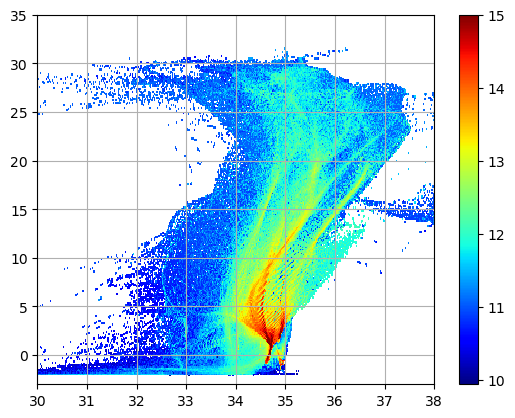

In [169]:
plt.pcolor(S_edges,T_edges,np.log10(hist_volume),vmax=15,
           cmap='jet');
plt.colorbar();
plt.grid()

In [170]:
hist_volume.shape
hist_volume_test = hist_volume*0
hist_volume_test[:index_of_last_T_edge_below_max_T, index_of_first_S_edge_above_min_S:index_of_last_S_edge_below_max_S]=1

/tmp/ipykernel_7052/27996673.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar();


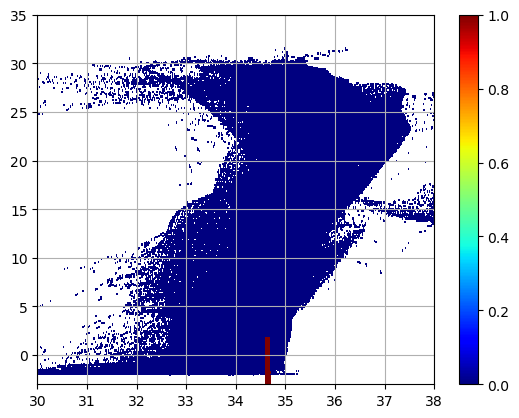

In [171]:
plt.pcolor(S_edges,T_edges,hist_volume_test,
           cmap='jet');
plt.colorbar();
plt.grid()

In [175]:
tmp=hist_volume[index_of_last_T_edge_above_min_T:index_of_last_T_edge_below_max_T, 
    index_of_first_S_edge_above_min_S:index_of_last_S_edge_below_max_S];

total_aabw = np.sum(tmp)
total_aabw # cubic meters
total_aabw / 1e9 /1e6 #million cubic km
#total aabw in jan 1 1992

333.2434557589453

In [7]:
ts_monthly = ea.ecco_podaac_to_xrdataset("ECCO_L4_TEMP_SALINITY_05DEG_DAILY_V4R4",\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [9]:
import seaborn as sns

In [10]:
ts_monthly.SALT.isel(time=0).values.flatten()

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [12]:
geom = ea.ecco_podaac_to_xrdataset("ECCO_L4_GEOMETRY_05DEG_V4R4",\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [13]:
geom_AAtiles = ds_dict['ECCO_L4_GEOMETRY_LLC0090GRID_V4R4'].isel(tile=[0,3,9,12])

('tile', 'j', 'i', 'k')


<xarray.DataArray ()> Size: 4B
array(1.3349987e+18, dtype=float32)

In [102]:
vol_m3 = 1.3349987e+18 # m3
vol_bm3 = 1.3349987e+18 / 1e9 # a billion
vol_bkm3 = vol_bm3 / 1e9 # m3 to km3

# total volume of the ocean
vol_bkm3

1.3349987

In [ ]:
num_bins = 300
temp_bins = np.linspace(ts.THETA.valid_min, ts.THETA.valid_max, num=num_bins+1)
salt_bins = np.linspace(ts.SALT.val

In [ ]:

# Use np.histogram2d to bin temperature, salinity, and sum the volume
hist_volume, T_edges, S_edges = np.histogram2d(T_flat, S_flat, bins=[temp_bins, salt_bins], weights=vol_flat, density=False)


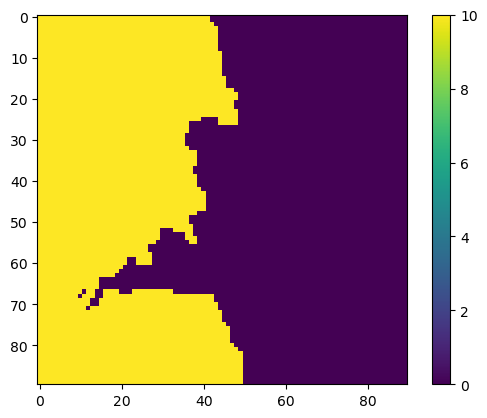

In [15]:
plt.imshow(h.isel(tile=3, k=0))
plt.colorbar()

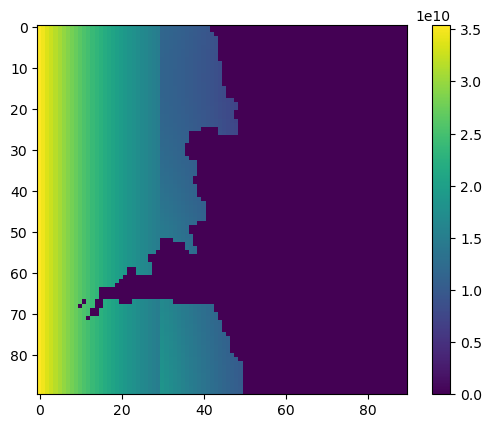

In [16]:
vol = geom_AAtiles.rA * h
plt.imshow(vol.sel(tile=12).isel(k=0))
plt.colorbar()

In [36]:
ts = ds_dict['ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4'].compute().isel(tile=[0,3,9,12])
ts

<xarray.Dataset> Size: 15MB
Dimensions:    (time: 1, k: 50, tile: 4, j: 90, i: 90, nb: 4, j_g: 90, i_g: 90,
                nv: 2, k_l: 50, k_p1: 51, k_u: 50)
Coordinates: (12/22)
    XC         (tile, j, i) float32 130kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds    (tile, j, i, nb) float32 518kB -115.0 -115.0 ... -115.0 -108.5
    XG         (tile, j_g, i_g) float32 130kB -115.0 -115.0 ... -102.9 -109.0
    YC         (tile, j, i) float32 130kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds    (tile, j, i, nb) float32 518kB -88.18 -88.32 ... -88.18 -88.16
    YG         (tile, j_g, i_g) float32 130kB -88.18 -88.32 ... -87.99 -88.02
    ...         ...
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 16B 0 3 9 12
  * time       (time) datetime64[ns] 8B 2000-01-16T12:00:00
    time_bnds  (time, nv) datetime64[ns] 16B 2000-01-01 2000-02-01
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, tile, j, i) float32 6MB nan nan nan nan ... nan nan nan
    THETA      (time, k, tile, j, i) float32 6MB nan nan nan nan ... nan nan nan
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            f07693e6-4181-11eb-beb3-0cc47a3f44ff

In [37]:
# Assuming you have a dataset where T and S are accessible for one tile
# Replace 'your_dataset' with the actual dataset variable and T/S field names
T = ts['THETA'].isel(tile=3, time=0)  # Extract temperature for tile 0
S = ts['SALT'].isel(tile=3, time=0)  # Extract salinity for tile 

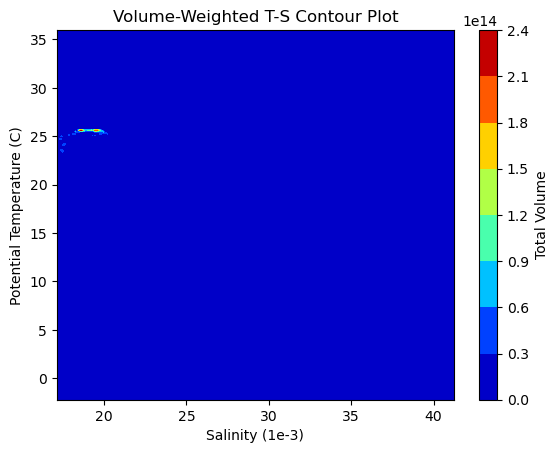

In [39]:
num_bins = 300
temp_bins = np.linspace(ts.THETA.valid_min, ts.THETA.valid_max, num=num_bins+1)
salt_bins = np.linspace(ts.SALT.valid_min, ts.SALT.valid_max, num=num_bins+1)

# Assuming T and S are already extracted for the selected tile
T = ts['THETA'].isel(tile=3, time=0).values  # Temperature for tile 12
S = ts['SALT'].isel(tile=3, time=0).values   # Salinity for tile 12
V = vol.isel(tile=3).values    # Volume for tile 12

# Flatten the i, j, k dimensions to count all grid cells
T_flat = T.flatten()
S_flat = S.flatten()
vol_flat = V.flatten()

# Use np.histogram2d to bin temperature, salinity, and sum the volume
hist_volume, T_edges, S_edges = np.histogram2d(T_flat, S_flat, bins=[temp_bins, salt_bins], weights=vol_flat, density=False)

# Plot the contour plot with the binned volumes
T_centers = (T_edges[:-1] + T_edges[1:]) / 2  # Compute bin centers for T
S_centers = (S_edges[:-1] + S_edges[1:]) / 2  # Compute bin centers for S

plt.contourf(S_centers, T_centers, hist_volume.T, cmap='jet')
plt.colorbar(label='Total Volume')
plt.xlabel('Salinity (1e-3)')
plt.ylabel('Potential Temperature (C)')
plt.title('Volume-Weighted T-S Contour Plot')
# plt.xlim(17.15,20.5)
# plt.ylim(23,26.5)
plt.show()

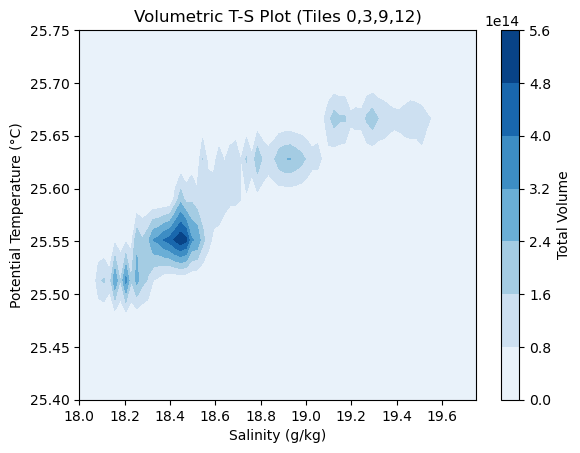

<Figure size 640x480 with 0 Axes>

In [47]:
# Define the number of bins
num_bins = 1000
temp_bins = np.linspace(ts.THETA.valid_min, ts.THETA.valid_max, num=num_bins+1)
salt_bins = np.linspace(ts.SALT.valid_min, ts.SALT.valid_max, num=num_bins+1)

# Initialize an array to store the cumulative histogram for all tiles
total_hist_volume = np.zeros((num_bins, num_bins))

# Loop over all available tiles and accumulate the volume-weighted histogram
for tile in range(ts.sizes['tile']):  # Using ts.sizes['tile'] to get the correct number of tiles
    # Extract temperature, salinity, and volume data for the current tile
    T = ts['THETA'].isel(tile=tile, time=0).values
    S = ts['SALT'].isel(tile=tile, time=0).values
    V = vol.isel(tile=tile).values

    # Flatten the i, j, k dimensions to count all grid cells
    T_flat = T.flatten()
    S_flat = S.flatten()
    vol_flat = V.flatten()

    # Use np.histogram2d to bin temperature, salinity, and sum the volume for the current tile
    hist_volume, S_edges, T_edges = np.histogram2d(S_flat, T_flat, bins=[salt_bins, temp_bins], weights=vol_flat, density=False)

    # Accumulate the volume histogram across all tiles
    total_hist_volume += hist_volume

# Compute bin centers for T and S
T_centers = (T_edges[:-1] + T_edges[1:]) / 2  # Temperature bin centers
S_centers = (S_edges[:-1] + S_edges[1:]) / 2  # Salinity bin centers

# Plot the contour plot with the accumulated volumes from all tiles
plt.contourf(S_centers, T_centers, total_hist_volume, cmap='Blues')
plt.colorbar(label='Total Volume')
plt.xlabel('Salinity (g/kg)')
plt.ylabel('Potential Temperature (°C)')
plt.title('Volumetric T-S Plot (Tiles 0,3,9,12)')
plt.xlim(18,19.75)
plt.ylim(25.4,25.75)
plt.show()
plt.savefig('volumetric_ts')